# Final Project Stage 1

**Dataset :**<br>
**Churn for Bank Customer**<br>

In [90]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [91]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [92]:
data = pd.read_csv('Churn_Modelling_2.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descriptive Statistics

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) 
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
  misal untuk A: “Semua tipe data sudah sesuai”

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Semua tipe data dari setiap kolom sudah sesuai, begitu juga dengan nama kolom dan isinya juga sudah sesuai.  
Terdapat 10000 baris data, dengan jumlah attribut 14.

In [94]:
print("Nilai yang kosong di setiap kolom:")
missing_values = data.isnull().sum()
print(missing_values)

Nilai yang kosong di setiap kolom:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Dari 14 attribut tersebut, tidak ada attribut yang memiliki nilai kosong.

In [95]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [96]:
cats = ['Geography','Gender', 'Tenure', 'NumOfProducts','HasCrCard','IsActiveMember','Exited']
nums = ['CreditScore','Age','Balance','EstimatedSalary']

In [97]:
data_new = data.copy()
data1 = data.copy()
data_new['Tenure'] = data_new['Tenure'].astype(str)
data_new['NumOfProducts'] = data_new['NumOfProducts'].astype(str)
data_new['HasCrCard'] = data_new['HasCrCard'].astype(str)
data_new['IsActiveMember'] = data_new['IsActiveMember'].astype(str)
data_new['Exited'] = data_new['Exited'].astype(str)

In [98]:
data_new[nums].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


Untuk data CreditScore, Age, Tenure dan EstimatedSalary diperkirakan datanya memiliki distribusi normal karena nilai mean dan mediannya itu hampir sama, sedangkan atribut Balance, itu tidak memiliki distribusi normal karena nilai mean < median.

In [99]:
data_new[cats].describe()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000
unique,3,2,11,4,2,2,2
top,France,Male,2,1,1,1,0
freq,5014,5457,1048,5084,7055,5151,7963


Untuk data2 kategorikal, terdapat 7 attribut. Untuk atribut Exited, jumlah class nya tidak berimbang sehingga perlu untuk di sesuaikan ketika proses training.

## Sumarry Descriptive Statistics

Semua tipe data dari setiap kolom sudah sesuai, begitu juga dengan nama kolom dan isinya juga sudah sesuai.  
Terdapat 10000 baris data, dengan jumlah attribut 14. Dari 14 attribut tersebut, tidak ada attribut yang memiliki nilai kosong.   
Untuk data **CreditScore**, **Age**, **Tenure** dan **EstimatedSalary** diperkirakan datanya memiliki distribusi normal karena nilai mean dan mediannya itu hampir sama, sedangkan atribut **Balance**, itu tidak memiliki distribusi normal karena nilai mean < median.   
Untuk data2 kategorikal, terdapat 6 attribut. Untuk atribut Exited, jumlah class nya tidak berimbang sehingga perlu untuk di sesuaikan ketika proses training.

## Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Variabel Continue

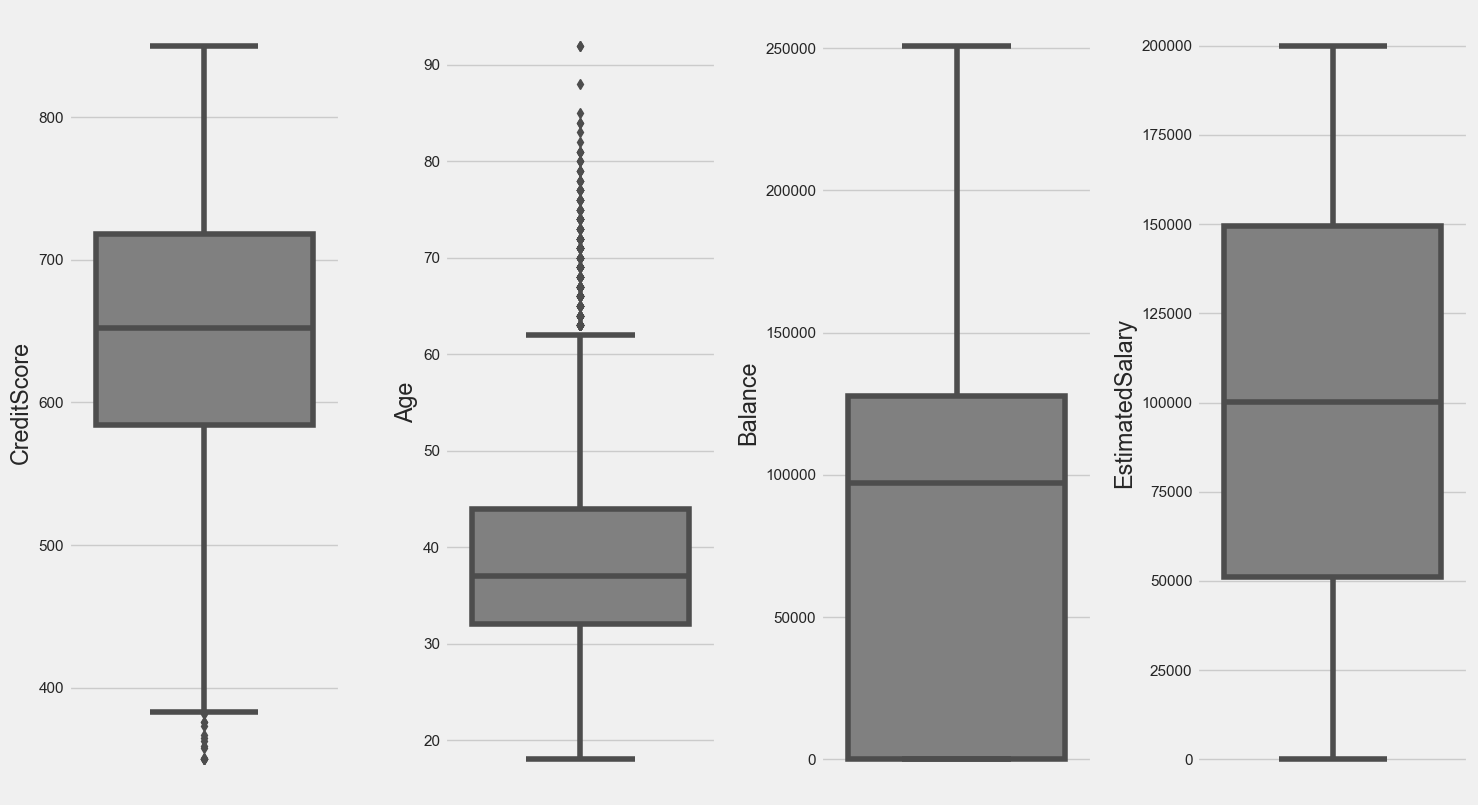

In [100]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_new[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Atribut Age memiliki data outlier dan sebaran paling banyak di usia 30 - 45 tahun.

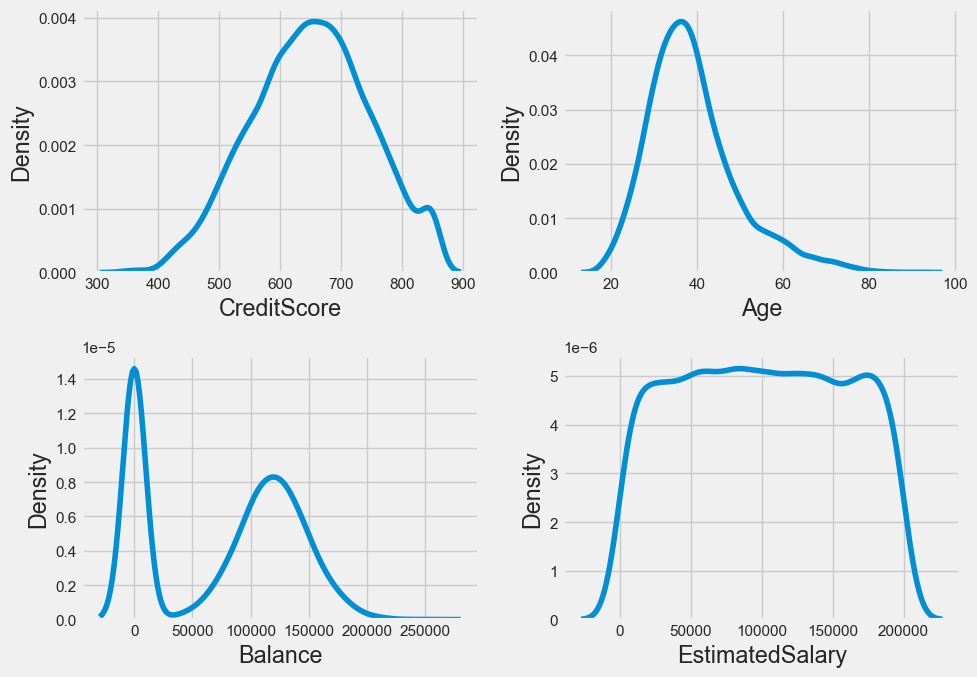

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

sns.kdeplot(data_new['CreditScore'], ax=axs[0, 0])
sns.kdeplot(data_new['Age'], ax=axs[0, 1])
sns.kdeplot(data_new['Balance'], ax=axs[1, 0])
sns.kdeplot(data_new['EstimatedSalary'], ax=axs[1, 1])

plt.tight_layout()
plt.show()

- Sebaran CreditScore paling banyak antara 600 - 700.
- Distribusi Age condong kekanan atau positif akibat dari beberapa data outlier.
- Ternyata data Balance (Saldo akun pelanggan) kebanyakan bernilai 0.
- EstimatedSalary memiliki distribusi seragam atau uniform.

### Variabel Kategorik

In [102]:
cats = ['Geography','Gender', 'Tenure', 'NumOfProducts','HasCrCard','IsActiveMember']

In [103]:
def category(kolom):
    print(data1[kolom].value_counts())
    prop_feature = data1[kolom].value_counts(normalize=True) * 100
    print(prop_feature)
    plt.figure(figsize=(6, 5))
    sns.countplot(data1, x = kolom)
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64


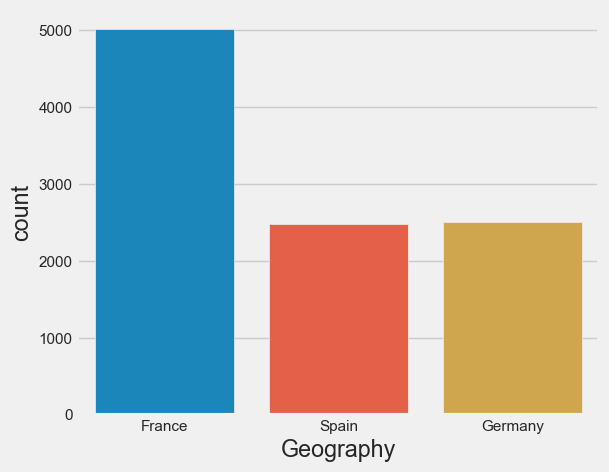

Male      5457
Female    4543
Name: Gender, dtype: int64
Male      54.57
Female    45.43
Name: Gender, dtype: float64


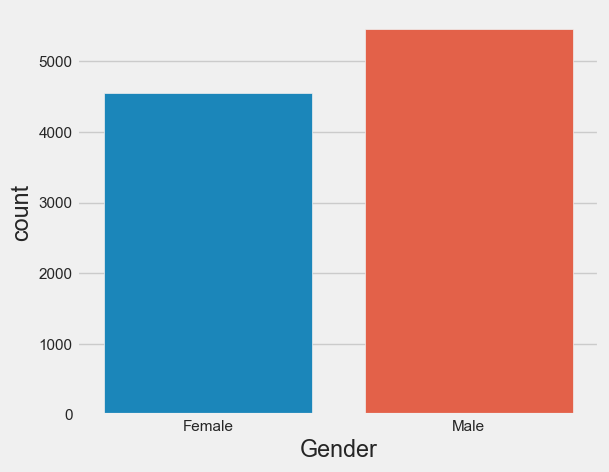

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64


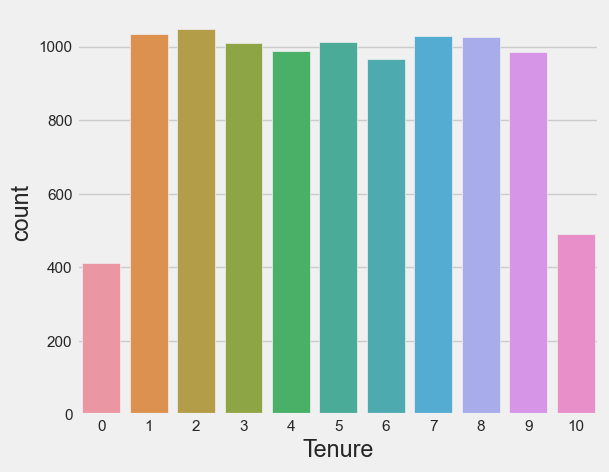

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64


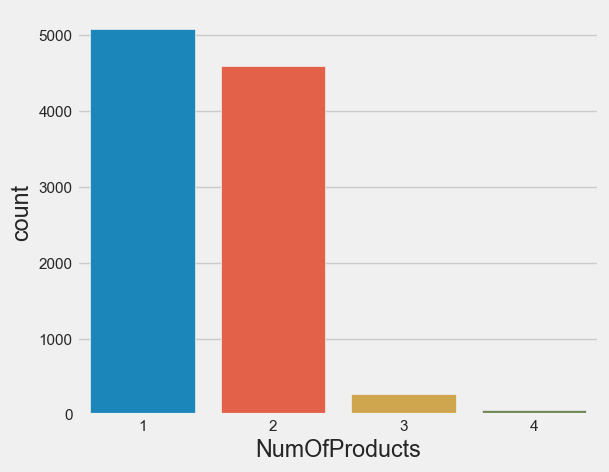

1    7055
0    2945
Name: HasCrCard, dtype: int64
1    70.55
0    29.45
Name: HasCrCard, dtype: float64


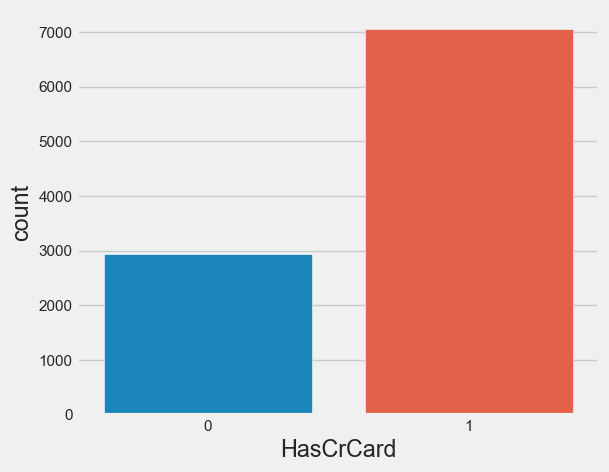

1    5151
0    4849
Name: IsActiveMember, dtype: int64
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64


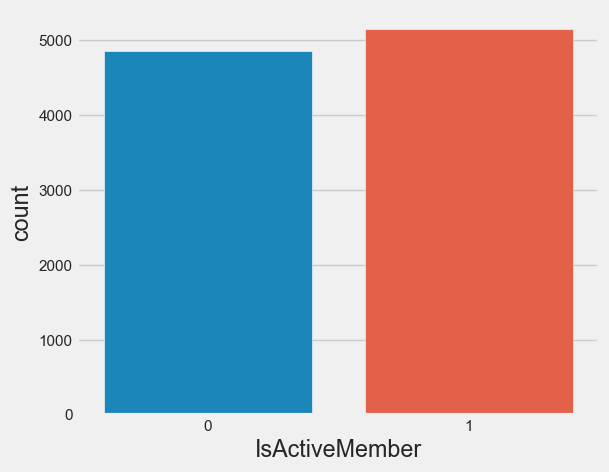

In [104]:
for i in cats:
    category(i)

0    79.63
1    20.37
Name: Exited, dtype: float64


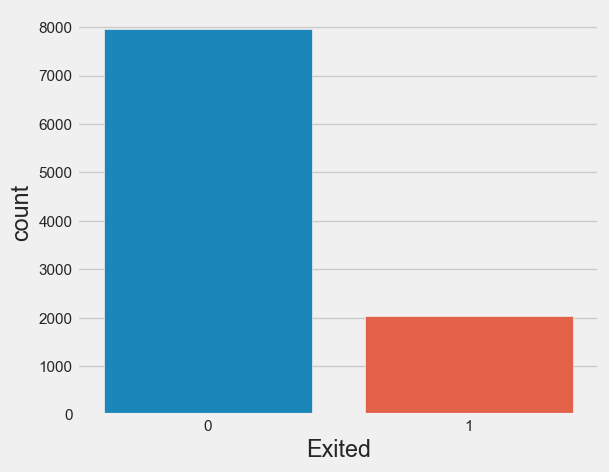

In [105]:
prop_target = data1['Exited'].value_counts(normalize=True) * 100
print(prop_target)
plt.figure(figsize=(6, 5))
sns.countplot(data1, x = 'Exited')
plt.show()

- Kebanyakan customer berada di France, jumlah customer di Spain dan Germany cenderung sama.
- Jenis kelamin customer didominasi oleh laki-laki namun jumlahnya tidak terlalu jauh dengan customer perempuan (distribusi seimbang).
- NumOfProducts 1 dan 2 paling banyak dimiliki customer dan jumlah NumOfProducts 3 dan 4 sangat sedikit dan selisih perbedaannya signifikan.
- Customer pada umumnya memiliki kartu kredit dan distribusinya tidak seimbang.
- Customer kebanyakan merupakan anggota aktif dan namun distribusinya seimbang.
- 80% customer tidak churn dan distribusi Exited tidak seimbang.

## Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?  
Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

### Korelasi variabel kategorik terhadap variabel target

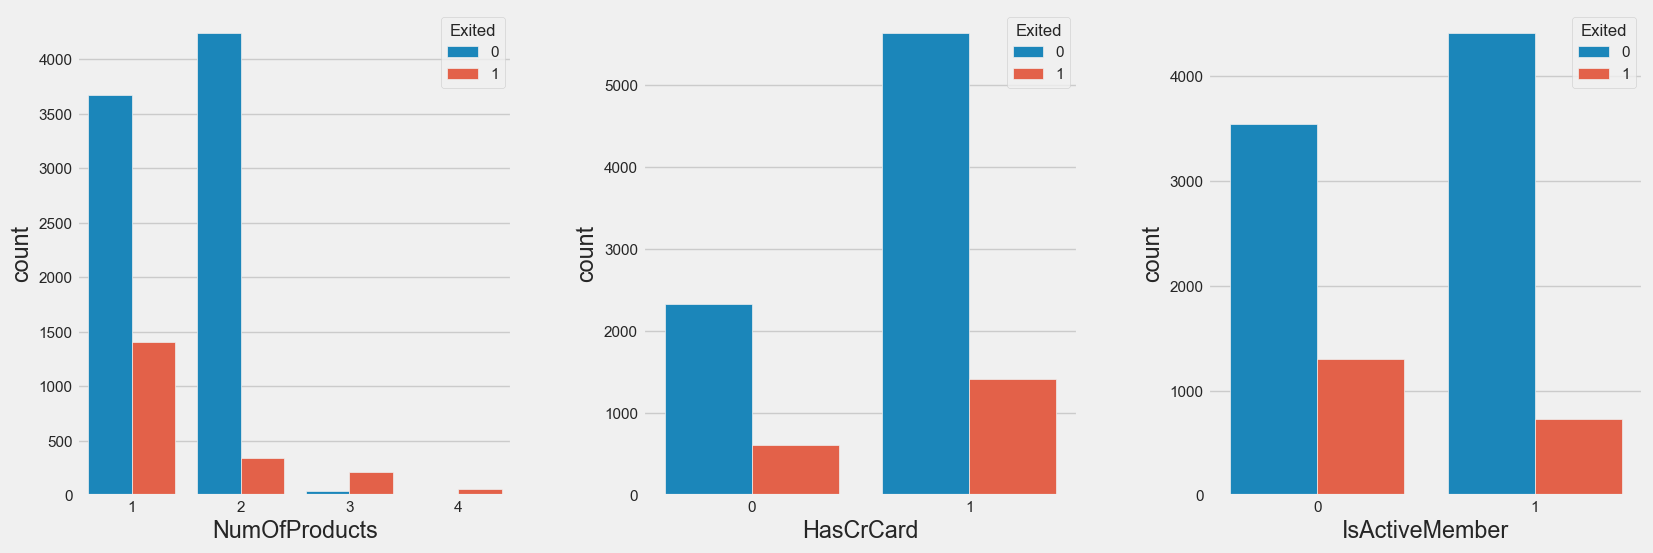

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = data1, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = data1, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = data1, ax = ax[2])
plt.show()

In [107]:
# Churn rate by NumOfProducts
churn_rate_NumOfProducts = data1.groupby('NumOfProducts')['Exited'].mean()
print(churn_rate_NumOfProducts)

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


Customer dengan 3 atau 4 produk memiliki peluang lebih tinggi untuk melakukan Churn.

In [108]:
# Churn rate by HasCrCard
churn_rate_HasCrCard = data1.groupby('HasCrCard')['Exited'].mean()
print(churn_rate_HasCrCard)

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


Memiliki kartu kredit tampaknya tidak mempengaruhi tingkat churn.

In [109]:
# Churn rate by IsActiveMember
churn_rate_IsActiveMember = data1.groupby('IsActiveMember')['Exited'].mean()
print(churn_rate_IsActiveMember)

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


Customer yang tidak aktif menggunakan bank lebih banyak meninggalkan bank (churn).

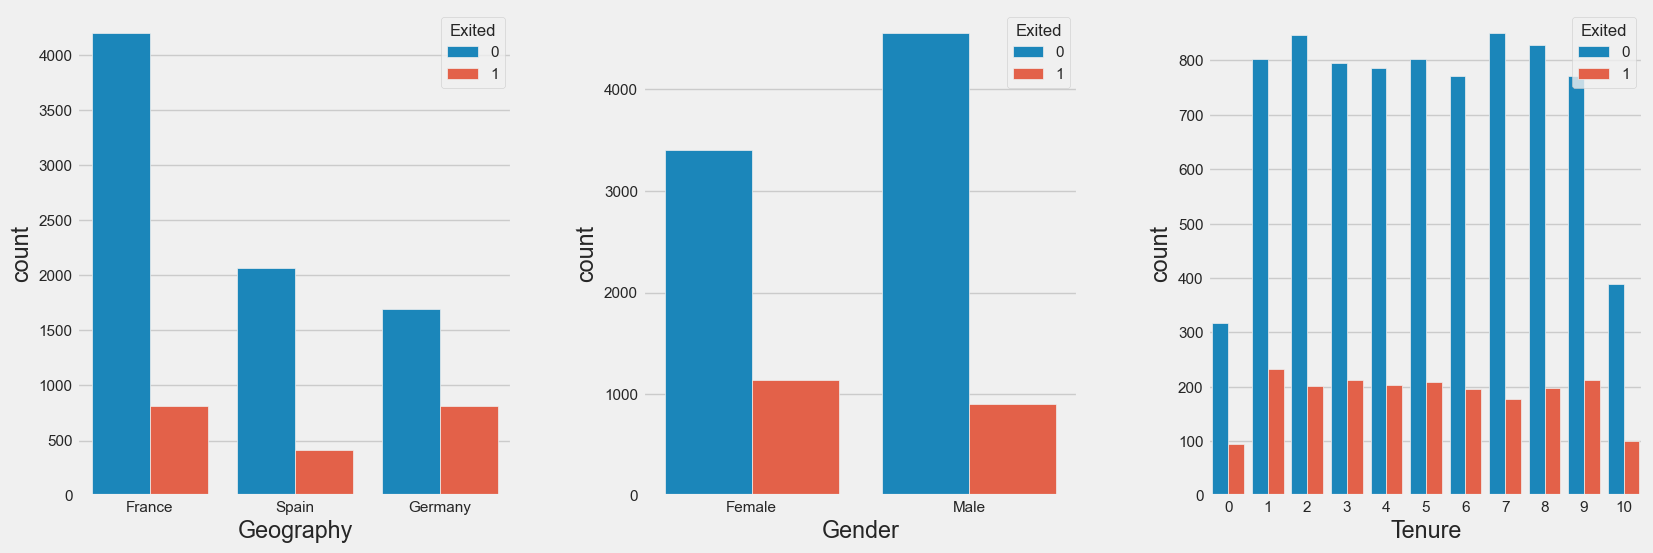

In [110]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "Geography", hue="Exited", data = data1, ax= ax[0])
sns.countplot(x = "Gender", hue="Exited", data = data1, ax = ax[1])
sns.countplot(x = "Tenure", hue="Exited", data = data1, ax = ax[2])
plt.show()

In [111]:
# Churn rate by geography
churn_rate_geography = data1.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


Pelanggan di Jerman lebih cenderung melakukan churn dibandingkan pelanggan di dua negara lainnya (tingkat churn hampir dua kali lipat dibandingkan Spanyol dan Prancis).

In [112]:
# Churn rate by gender
churn_rate_gender = data1.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


Customer wanita yang cenderung melakukan churn.

In [113]:
# Churn rate by tenure
churn_rate_tenure = data1.groupby('Tenure')['Exited'].mean()
print(churn_rate_tenure)

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64


Tenure cenderung tidak mempengaruhi customer melakukan churn karena persentase setiap tenure hampir sama.

### Korelasi antar variabel Numerik atau terhadap variabel target

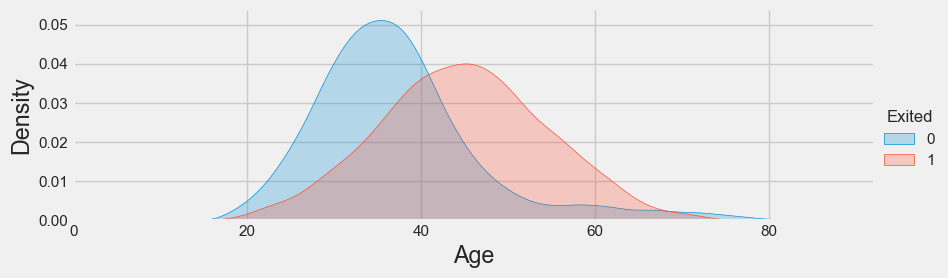

In [114]:
facet = sns.FacetGrid(data1, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data1["Age"].max()))
facet.add_legend()

plt.show()

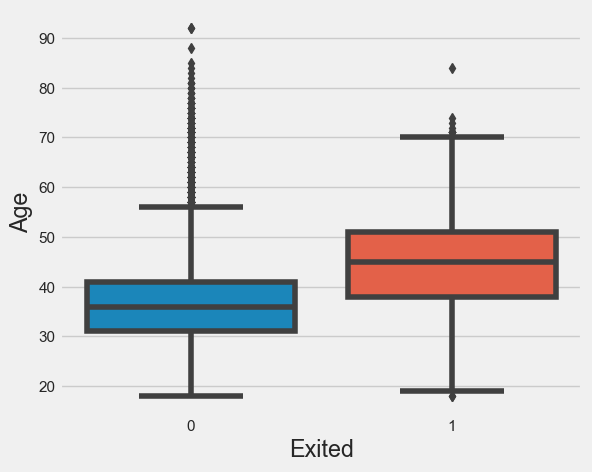

In [115]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=data1, x="Exited", y="Age")
plt.show()

Terdapat perbedaan yang jelas antara kelompok usia karena pelanggan yang lebih tua (diatas umur 40 an) lebih cenderung melakukan churn. 

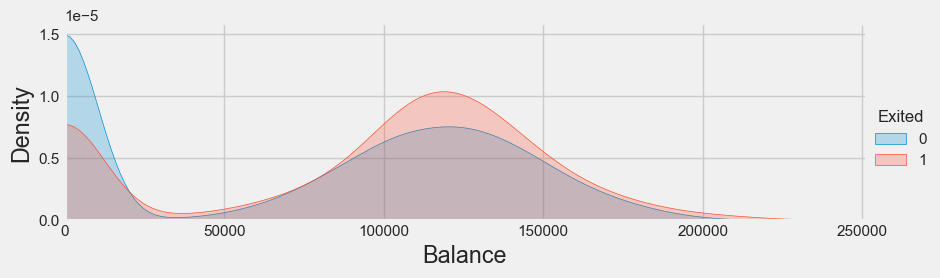

In [116]:
facet = sns.FacetGrid(data1, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data1["Balance"].max()))
facet.add_legend()

plt.show()

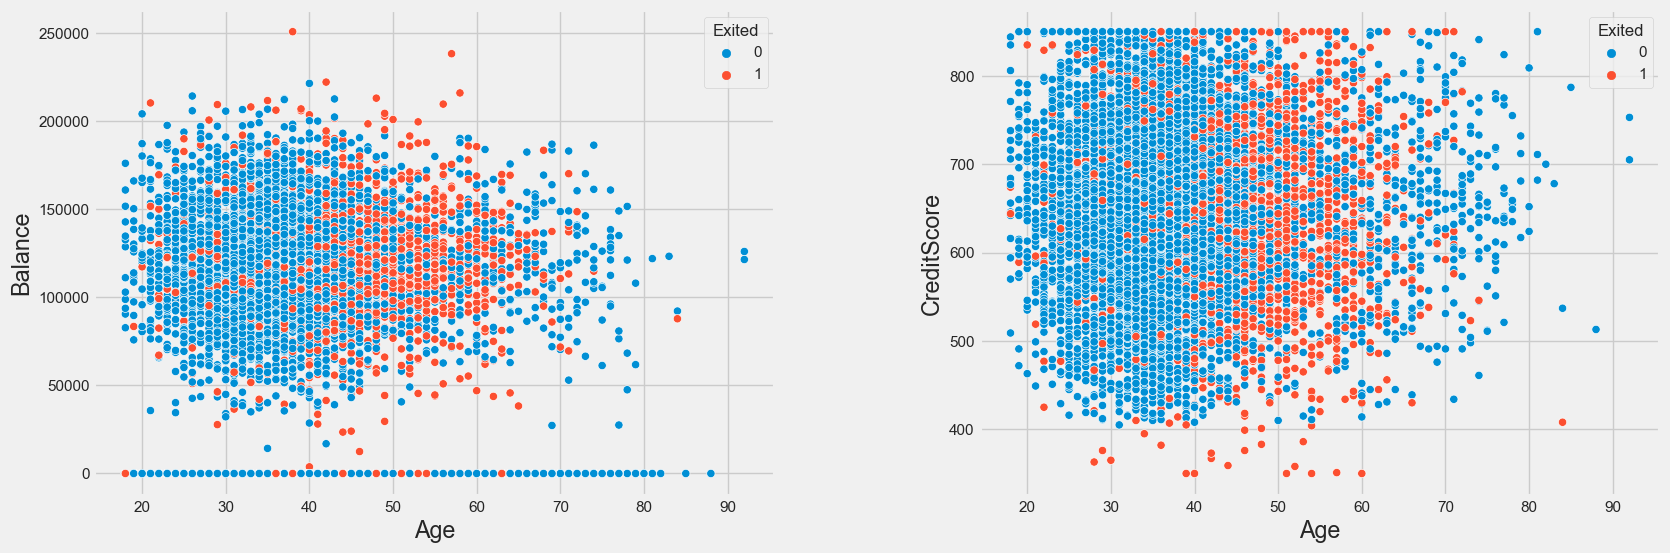

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(data=data1, x="Age", y="Balance", hue="Exited", ax = ax[0])
sns.scatterplot(data=data1, x="Age", y="CreditScore", hue="Exited", ax = ax[1])
plt.show()

- Customer berusia 45 hingga 65 tahun memiliki peluang lebih tinggi untuk melakukan churn
- Customer dengan CreditScore kurang dari 400 memiliki peluang lebih tinggi untuk melakukan churn

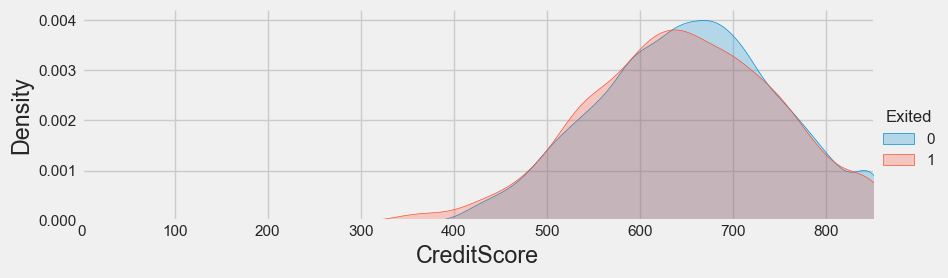

In [118]:
facet = sns.FacetGrid(data1, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data1["CreditScore"].max()))
facet.add_legend()

plt.show()

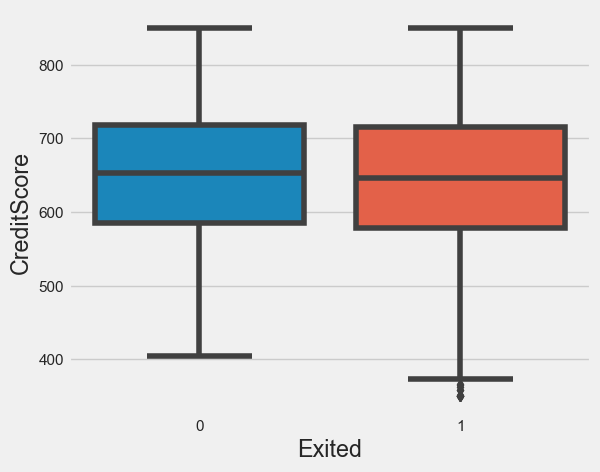

In [119]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=data1, x="Exited", y="CreditScore")
plt.show()

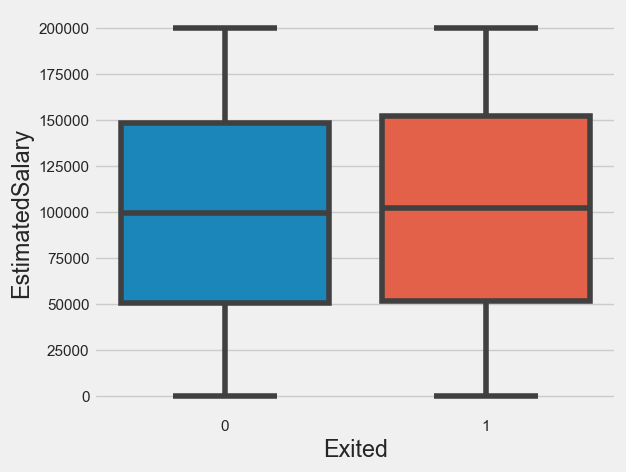

In [120]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=data1, x="Exited", y="EstimatedSalary")
plt.show()

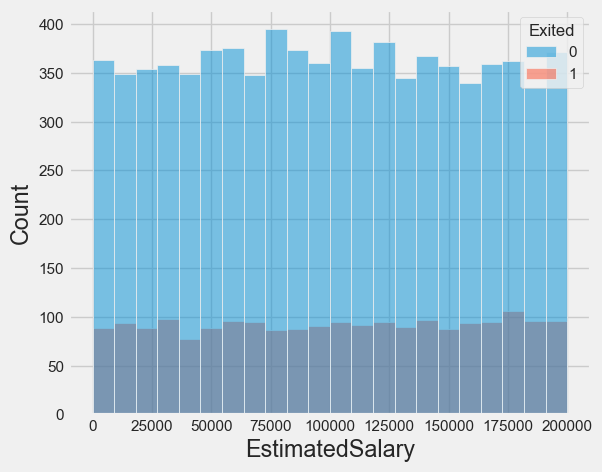

In [121]:
plt.figure(figsize=(6, 5))
sns.histplot(data=data1, x="EstimatedSalary", hue="Exited")
plt.show()

Baik customer churn maupun customer tidak churn menunjukkan distribusi gaji yang seragam dan uniform. Oleh karena itu, kita dapat menyimpulkan bahwa gaji tidak memiliki pengaruh yang signifikan terhadap kemungkinan churn.

### Matrix Korelasi

In [122]:
data.sample(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5909,5910,15713043,Siciliani,691,France,Female,33,6,0.0,2,1,1,100408.31,0


In [123]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary","Exited"]

In [124]:
data[list_corr].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


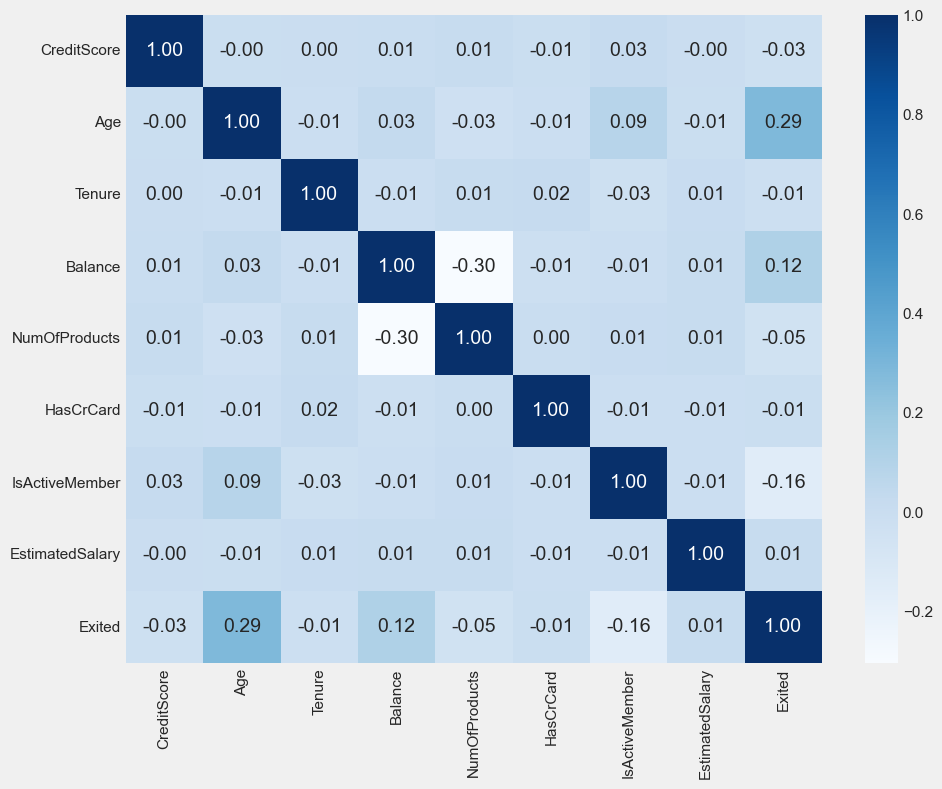

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[list_corr].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Diantara feature, Usia memiliki hubungan paling kuat dengan Exited (0.29)

# Business Insight

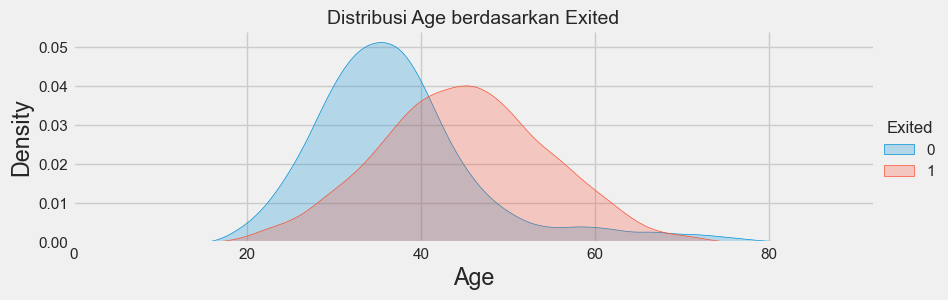

In [126]:
facet = sns.FacetGrid(data1, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data1["Age"].max()))
facet.add_legend()

plt.title('Distribusi Age berdasarkan Exited', fontsize=14)
plt.show()

Usia mempengaruhi customer melakukan churn atau tidak. Berdasarkan chart diatas dapat disimpulkan bahwa usia yang paling banyak meninggalkan bank (churn) adalah usia 40 - 65 tahun. 

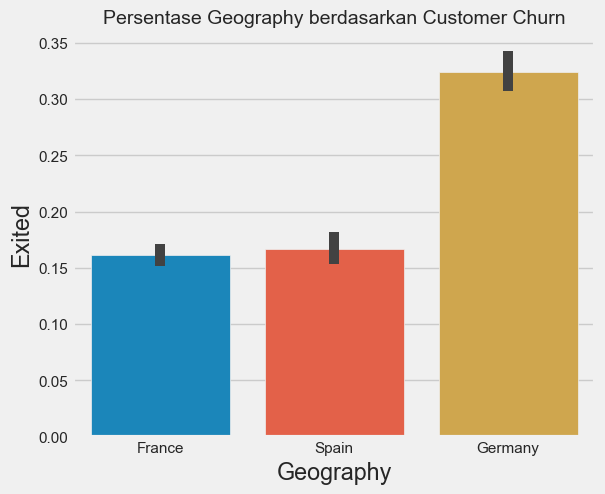

In [127]:
plt.figure(figsize=(6, 5))

sns.barplot(data1, x="Geography", y="Exited")

plt.title('Persentase Geography berdasarkan Customer Churn', fontsize=14)
plt.show()

Pelanggan di Jerman lebih cenderung melakukan churn dibandingkan pelanggan di dua negara lainnya (tingkat churn hampir dua kali lipat dibandingkan Spanyol dan Prancis).

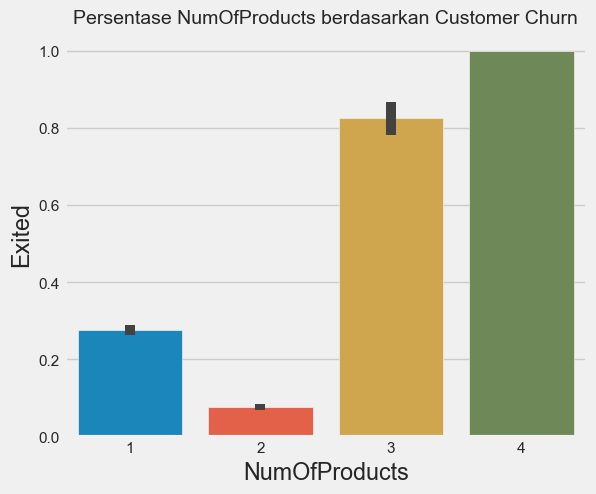

In [128]:
plt.figure(figsize=(6, 5))

sns.barplot(data1, x="NumOfProducts", y="Exited")

plt.title('Persentase NumOfProducts berdasarkan Customer Churn', fontsize=14)
plt.show()

Semua customer yang memiliki NumOfProducts 4 telah churn dan lebih banyak customer yang memiliki NumOfProducts 3 yang churn dibandingkan customer yang memiliki NumOfProducts 1 dan 2.

Rekomendasi :
1. Fokus lebih pada kelompok customer yang memiliki potensi lebih rendah untuk melakukan churn. Misalnya, customer dengan usia 20 - 40 tahun.
2. Fokus lebih pada customer di Jerman yang memiliki potensi lebih tinggi untuk melakukan churn. Dengan demikian, strategi pemasaran dan retensi dapat disesuaikan secara lebih efektif.
3. Membangun program loyalitas khusus untuk customer dengan NumOfProducts 3 dan 4. Ini bisa berupa layanan eksklusif yang memotivasi mereka untuk tetap menggunakan setia pada bank.

# Data Pre-Processing

## Data Cleansing

### Missing Value

In [129]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Berdasarkan data.info() tidak ditemukan data yang kosong atau hilang.

### Duplicate Values

In [130]:
data.duplicated().sum()

0

Tidak ada kolom yang duplicate dari semua kolom

### Outliers

In [131]:
data_out = ['CreditScore','Age']

In [132]:
from scipy import stats

In [133]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))

for col in data_out:
    zscore = abs(stats.zscore(data[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data_clean = data[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data_clean)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9859


Seperti yang terlihat di atas, kita menghapus sekitar ~141 baris yang berisi outlier berdasarkan z-score.

In [134]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9859 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9859 non-null   int64  
 1   CustomerId       9859 non-null   int64  
 2   Surname          9859 non-null   object 
 3   CreditScore      9859 non-null   int64  
 4   Geography        9859 non-null   object 
 5   Gender           9859 non-null   object 
 6   Age              9859 non-null   int64  
 7   Tenure           9859 non-null   int64  
 8   Balance          9859 non-null   float64
 9   NumOfProducts    9859 non-null   int64  
 10  HasCrCard        9859 non-null   int64  
 11  IsActiveMember   9859 non-null   int64  
 12  EstimatedSalary  9859 non-null   float64
 13  Exited           9859 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


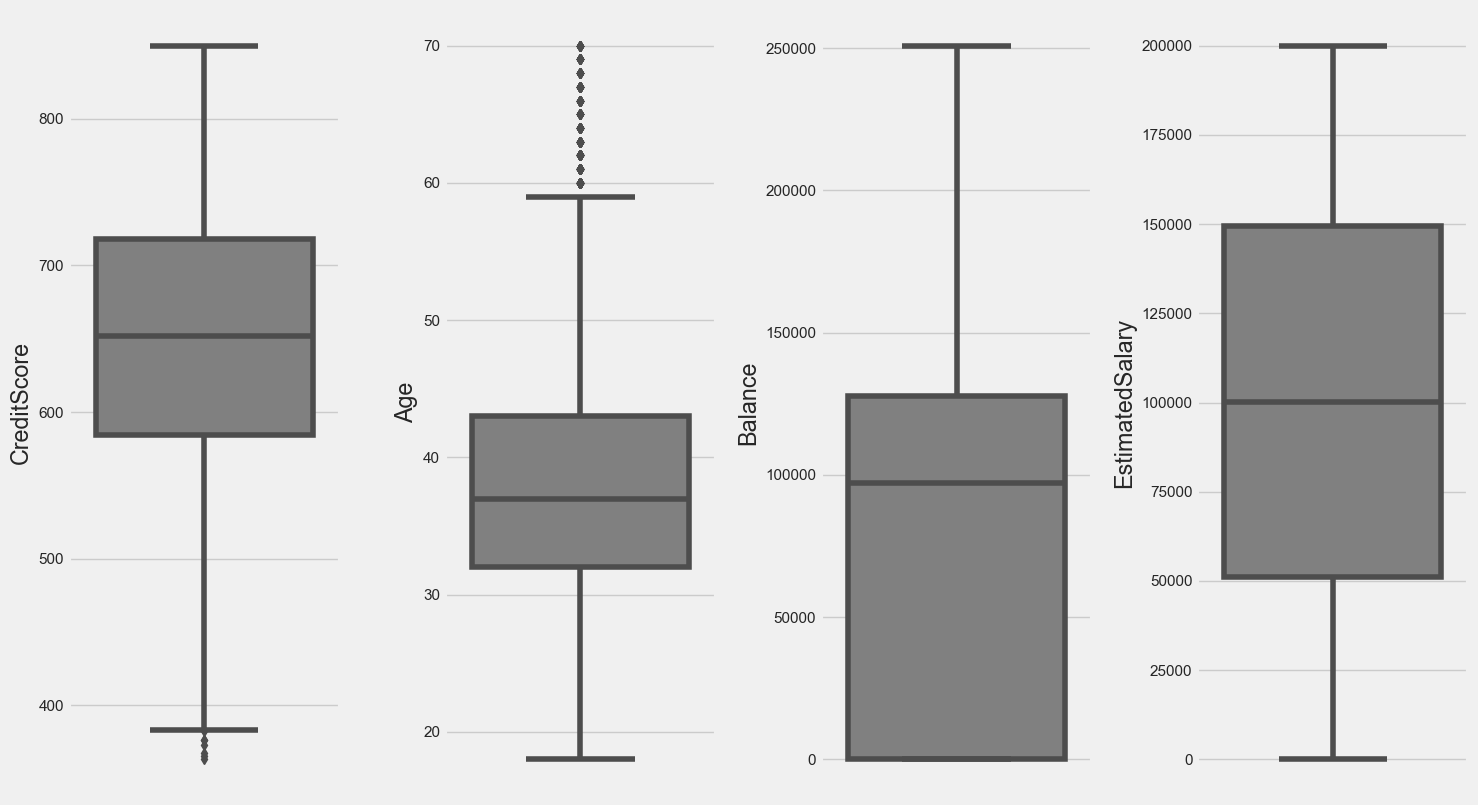

In [135]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_clean[nums[i]], color='gray', orient='v')
    plt.tight_layout()

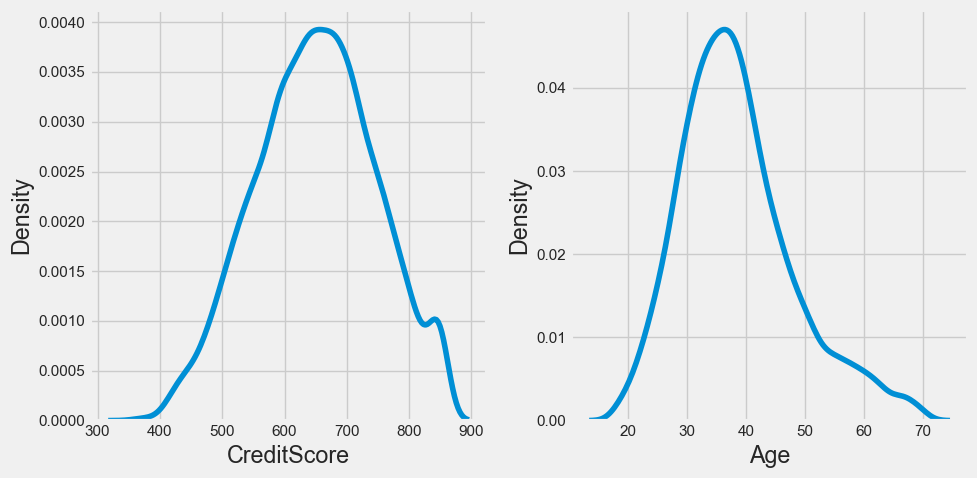

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(data_clean['CreditScore'], ax=axs[0])
sns.kdeplot(data_clean['Age'], ax=axs[1])

plt.tight_layout()
plt.show()

CreditScore dan Age sudah terlihat normal.

In [137]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary","Exited"]

In [138]:
data_clean[list_corr].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008148,-0.000241,0.008244,0.011316,-0.004063,0.023345,0.001336,-0.021520
Age,-0.008148,1.000000,-0.011741,0.037834,-0.031615,-0.014323,0.054121,-0.008331,0.327160
Tenure,-0.000241,-0.011741,1.000000,-0.012110,0.014433,0.021209,-0.027567,0.008612,-0.014766
Balance,0.008244,0.037834,-0.012110,1.000000,-0.304243,-0.015901,-0.008384,0.012686,0.117918
NumOfProducts,0.011316,-0.031615,0.014433,-0.304243,1.000000,0.002625,0.009329,0.014039,-0.047807
HasCrCard,-0.004063,-0.014323,0.021209,-0.015901,0.002625,1.000000,-0.012577,-0.009952,-0.007268
IsActiveMember,0.023345,0.054121,-0.027567,-0.008384,0.009329,-0.012577,1.000000,-0.011176,-0.152352
EstimatedSalary,0.001336,-0.008331,0.008612,0.012686,0.014039,-0.009952,-0.011176,1.000000,0.009973
Exited,-0.021520,0.327160,-0.014766,0.117918,-0.047807,-0.007268,-0.152352,0.009973,1.000000


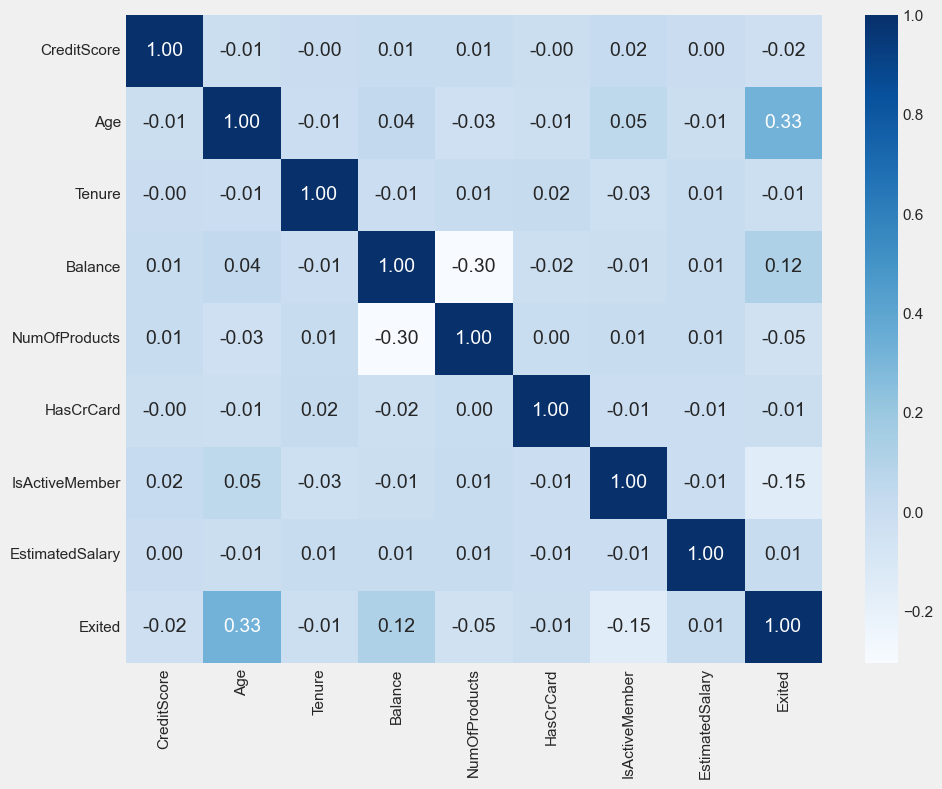

In [139]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean[list_corr].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### Normalization/Standardization

In [140]:
from sklearn.preprocessing import StandardScaler

# CreditScore, Age, Balance dan EstimatedSalary kita standarisasi 
data_clean['CreditScore'] = StandardScaler().fit_transform(data_clean['CreditScore'].values.reshape(len(data_clean), 1))
data_clean['Age'] = StandardScaler().fit_transform(data_clean['Age'].values.reshape(len(data_clean), 1))
data_clean['Balance'] = StandardScaler().fit_transform(data_clean['Balance'].values.reshape(len(data_clean), 1))
data_clean['EstimatedSalary'] = StandardScaler().fit_transform(data_clean['EstimatedSalary'].values.reshape(len(data_clean), 1))

In [141]:
data_clean.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9859.000000,9.859000e+03,9.859000e+03,9.859000e+03,9859.000000,9.859000e+03,9859.000000,9859.000000,9859.000000,9.859000e+03,9859.000000
mean,4997.834162,1.569087e+07,3.495418e-17,-2.439585e-16,5.013287,-8.936738e-17,1.530581,0.705244,0.509889,-1.623387e-16,0.204686
std,2887.576061,7.190088e+04,1.000051e+00,1.000051e+00,2.891198,1.000051e+00,0.582208,0.455956,0.499928,1.000051e+00,0.403493
min,1.000000,1.556570e+07,-2.984630e+00,-2.111901e+00,0.000000,-1.227458e+00,1.000000,0.000000,0.000000,-1.740199e+00,0.000000
25%,2495.500000,1.562831e+07,-6.911950e-01,-6.646038e-01,3.000000,-1.227458e+00,1.000000,0.000000,0.000000,-8.534351e-01,0.000000
50%,5000.000000,1.569074e+07,1.447739e-02,-1.477119e-01,5.000000,3.324484e-01,1.000000,1.000000,1.000000,1.383298e-03,0.000000
75%,7497.500000,1.575310e+07,6.993947e-01,4.725585e-01,7.000000,8.188112e-01,2.000000,1.000000,1.000000,8.577272e-01,0.000000
max,10000.000000,1.581569e+07,2.069229e+00,3.263775e+00,10.000000,2.794168e+00,4.000000,1.000000,1.000000,1.738246e+00,1.000000


### Feature encoding

Strategi encoding
* `Gender` : label encoding
* `Geography`: One Hot Encoding 

In [142]:
data_clean.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.327981,France,Female,0.369180,2,-1.227458,1,1,1,0.022450,1
1,2,15647311,Hill,-0.442134,Spain,Female,0.265802,1,0.115891,1,0,1,0.217152,0
2,3,15619304,Onio,-1.542153,France,Female,0.369180,8,1.331732,3,1,0,0.241312,1
3,4,15701354,Boni,0.502222,France,Female,0.059045,1,-1.227458,2,0,0,-0.108391,0
4,5,15737888,Mitchell,2.069229,Spain,Female,0.472558,2,0.784345,1,1,1,-0.364821,0


In [143]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9859 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9859 non-null   int64  
 1   CustomerId       9859 non-null   int64  
 2   Surname          9859 non-null   object 
 3   CreditScore      9859 non-null   float64
 4   Geography        9859 non-null   object 
 5   Gender           9859 non-null   object 
 6   Age              9859 non-null   float64
 7   Tenure           9859 non-null   int64  
 8   Balance          9859 non-null   float64
 9   NumOfProducts    9859 non-null   int64  
 10  HasCrCard        9859 non-null   int64  
 11  IsActiveMember   9859 non-null   int64  
 12  EstimatedSalary  9859 non-null   float64
 13  Exited           9859 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [144]:
pd.set_option('display.max_columns', None)

In [145]:
# jenis_kelamin & pendidikan
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

data_clean['Gender'] = data_clean['Gender'].map(mapping_gender)


In [148]:
data_clean_encod = pd.get_dummies(data_clean, columns = ["Geography"])
data_clean_encod.drop('Geography_France', axis=1, inplace=True)

In [149]:
data_clean_encod.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.327981,0,0.369180,2,-1.227458,1,1,1,0.022450,1,0,0
1,2,15647311,Hill,-0.442134,0,0.265802,1,0.115891,1,0,1,0.217152,0,0,1
2,3,15619304,Onio,-1.542153,0,0.369180,8,1.331732,3,1,0,0.241312,1,0,0
3,4,15701354,Boni,0.502222,0,0.059045,1,-1.227458,2,0,0,-0.108391,0,0,0
4,5,15737888,Mitchell,2.069229,0,0.472558,2,0.784345,1,1,1,-0.364821,0,0,1


### Train & Test Split

In [150]:

X = data_clean_encod.drop(columns=['Exited','RowNumber', 'CustomerId','Surname'])
y = data_clean_encod['Exited']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

In [151]:
Xtrain.shape

(6901, 11)

In [152]:
ytrain.value_counts()

0    5485
1    1416
Name: Exited, dtype: int64

In [153]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6901 entries, 1816 to 7372
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6901 non-null   float64
 1   Gender             6901 non-null   int64  
 2   Age                6901 non-null   float64
 3   Tenure             6901 non-null   int64  
 4   Balance            6901 non-null   float64
 5   NumOfProducts      6901 non-null   int64  
 6   HasCrCard          6901 non-null   int64  
 7   IsActiveMember     6901 non-null   int64  
 8   EstimatedSalary    6901 non-null   float64
 9   Geography_Germany  6901 non-null   uint8  
 10  Geography_Spain    6901 non-null   uint8  
dtypes: float64(4), int64(5), uint8(2)
memory usage: 552.6 KB


### Class imbalance

In [154]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state = 42).fit_resample(Xtrain, ytrain)

In [155]:
print('Original')
print(pd.Series(ytrain).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    5485
1    1416
Name: Exited, dtype: int64


SMOTE
0    5485
1    5485
Name: Exited, dtype: int64


# Feature Engineering

Kami telah melakukan pemilihan fitur dengan menghapus kolom 'RowNumber', 'CustomerId', dan 'Surname'.

EstimatedSalary menampilkan distribusi seragam untuk kedua jenis pelanggan dan dapat dihilangkan.

In [156]:
cats_fix = ['Gender', 'Tenure', 'NumOfProducts','HasCrCard','IsActiveMember','Geography_Germany','Geography_Spain']

In [157]:
Xtrain.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
1816,-1.241204,1,-0.974739,3,0.609305,1,0,0,-0.425675,0,0
4087,-0.141186,1,2.229991,3,-1.227458,2,1,1,-0.519801,0,0
5153,0.460711,0,-0.974739,9,-1.227458,2,1,0,0.200156,0,0
4951,0.076743,1,-1.905144,7,-1.227458,2,0,0,1.523359,0,0
4668,-2.133672,1,-0.767982,7,1.097643,1,1,1,1.319071,0,0


In [158]:
from scipy.stats import chi2_contingency

chi2_array, p_array = [], []
for column in cats_fix:

    crosstab = pd.crosstab(Xtrain[column], ytrain)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': cats_fix,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
2,NumOfProducts,1054.531346,2.662618e-228
5,Geography_Germany,207.769640,4.211912e-47
4,IsActiveMember,159.782538,1.262296e-36
0,Gender,76.522996,2.176635e-18
6,Geography_Spain,14.971402,1.091529e-04
1,Tenure,14.361618,1.571268e-01
3,HasCrCard,1.941765,1.634770e-01


Tenure dan HasCrCard memiliki chi-kuadrat yang kecil dan nilai p lebih besar dari 0,05. sehigga dapat disimpulkan bahwa hipotesis awal kami bahwa kedua fitur ini tidak berpengaruh secara signifikan terhadap target. Maka kedua feature juga akan dibuang atau dihilangkan.

#### B. Feature extraction 

In [159]:
data['Balance_to_Salary_Ratio'] = data['Balance'] / data['EstimatedSalary']
data['Age_to_Tenure_Ratio'] = data['Age'] / data['Tenure']
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Salary_Ratio,Age_to_Tenure_Ratio
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,21.00
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,41.00
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,5.25
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,39.00
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,21.50
